# Data 4 Black Lives - COVID-19 Case/Death Disparities

Objective: Extract COVID-19 cases and deaths for each geographic location, both overall and for Black/African-Americans only.

Data sources for 3 locations (California (San Diego), Florida, and New York City) are provided in tables embedded in PDFs. There are tools that can extract tables from PDFs. Specifying the specific location of the table in the document can be a bit tricky, but this can certainly be done.

In [0]:
## home directory
home_dir = '/content'

In [62]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=c9f826859898655d46c5eb373caf45969718972f5a197cf859a37c99999a5992
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
## Import modules
import pandas as pd
import os
from datetime import datetime, timedelta
import wget

In [0]:
# Create new data folders
%mkdir data
%mkdir data/mass
%mkdir data/virginia
%mkdir data/dc

In [4]:
!ls data

dc  mass  virginia


In [0]:
## Dictionary to hold results
output = dict()

In [0]:
# Source: https://stackoverflow.com/questions/1080411/retrieve-links-from-web-page-using-python-and-beautifulsoup

from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests

def find_all_links(url, search_string=None):
    resp = requests.get(url)
    http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, from_encoding=encoding)

    link_list = []

    for link in soup.find_all('a', href=True):
        link_list.append(link['href'])

    if search_string:
        return [x for x in link_list if search_string in x]
    else:
        return link_list

## Massachusetts

In [0]:
## Navigate to Massachusetts data folder
mass_dir = os.path.join(home_dir, 'data', 'mass')
os.chdir(mass_dir)

In [65]:
mass_urls = find_all_links(url='https://www.mass.gov/info-details/covid-19-response-reporting', search_string='covid-19-raw-data')
mass_urls

['/doc/covid-19-raw-data-may-5-2020/download']

In [66]:
mass_url_fragment = mass_urls[0].split('/')[2]
mass_url = 'https://www.mass.gov/doc/{}/download'.format(mass_url_fragment); mass_url

'https://www.mass.gov/doc/covid-19-raw-data-may-5-2020/download'

In [73]:
## Download the file
## Cumulative number of cases / counts

mass_file = os.path.join(mass_dir, 'massachusetts.zip'); mass_file
os.system("wget -O {} {}".format(mass_file, mass_url))

# ! wget -O massachusetts.zip https://www.mass.gov/doc/covid-19-raw-data-may-3-2020/download

0

In [74]:
os.listdir()

['.config',
 'data',
 'covid_disparities_output_2020-05-06.csv',
 'massachusetts.zip',
 'sample_data']

In [75]:
## Unzip the file
! unzip massachusetts.zip

Archive:  massachusetts.zip
  inflating: External dashboard backup_05052020.xlsx  
  inflating: Data dictionary for External Dashboard Backup.docx  
  inflating: Data dictionary for CSVs.docx  
  inflating: Cases.csv               
  inflating: DeathsReported.csv      
  inflating: LTC Facilities.csv      
  inflating: Age.csv                 
  inflating: Age Means.csv           
  inflating: County.csv              
  inflating: Sex.csv                 
  inflating: Death Pies.csv          
  inflating: RaceEthnicity.csv       
  inflating: Testing2.csv            
  inflating: DateofDeath.csv         
  inflating: Hospitalization from Hospitals.csv  


In [76]:
!ls

 Age.csv
'Age Means.csv'
 Cases.csv
 County.csv
 covid_disparities_output_2020-05-06.csv
 data
'Data dictionary for CSVs.docx'
'Data dictionary for External Dashboard Backup.docx'
 DateofDeath.csv
'Death Pies.csv'
 DeathsReported.csv
'External dashboard backup_05052020.xlsx'
'Hospitalization from Hospitals.csv'
'LTC Facilities.csv'
 massachusetts.zip
 RaceEthnicity.csv
 sample_data
 Sex.csv
 Testing2.csv


In [77]:
df_mass_raw = pd.read_csv('RaceEthnicity.csv')
df_mass_raw

,Date,Race/Ethnicity,All Cases,Ever Hospitaltized,Deaths
0,4/6/2020,Non-Hispanic White,2120,320.0,55
1,4/6/2020,Non-Hispanic Black/African American,643,61.0,3
2,4/6/2020,Hispanic,857,80.0,6
3,4/6/2020,Non-Hispanic Asian,173,20.0,4
4,4/6/2020,Non-Hispanic Other,384,56.0,4
...,...,...,...,...,...
169,5/5/2020,Non-Hispanic Black/African American,5113,647.0,231
170,5/5/2020,Hispanic,8960,803.0,226
171,5/5/2020,Non-Hispanic Asian,1073,173.0,75
172,5/5/2020,Non-Hispanic Other,2474,340.0,129


In [78]:
aa_cnt = df_mass_raw[df_mass_raw['Race/Ethnicity'] == 'Non-Hispanic Black/African American']; aa_cnt.head()

,Date,Race/Ethnicity,All Cases,Ever Hospitaltized,Deaths
1,4/6/2020,Non-Hispanic Black/African American,643,61.0,3
8,4/8/2020,Non-Hispanic Black/African American,889,85.0,7
14,4/9/2020,Non-Hispanic Black/African American,992,100.0,11
20,4/10/2020,Non-Hispanic Black/African American,1151,NaN,15
26,4/11/2020,Non-Hispanic Black/African American,1254,NaN,17


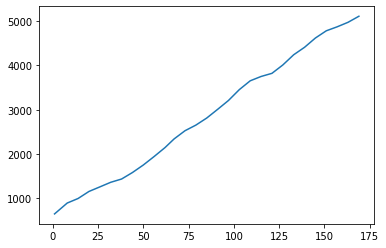

In [79]:
aa_cnt['All Cases'].plot()

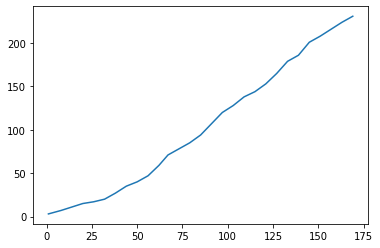

In [80]:
aa_cnt['Deaths'].plot()

In [81]:
## Get only the most recent data published
## TO DO: Convert date to string first before finding the max
mass_max_date = max(df_mass_raw.Date); mass_max_date
# mass_max_date = '4/9/2020' # Uncomment to verify that calculations as of D4BL's last refresh match these calculations 

df_mass = df_mass_raw[df_mass_raw.Date == mass_max_date]; df_mass

,Date,Race/Ethnicity,All Cases,Ever Hospitaltized,Deaths
168,5/5/2020,Non-Hispanic White,16384,2448.0,1593
169,5/5/2020,Non-Hispanic Black/African American,5113,647.0,231
170,5/5/2020,Hispanic,8960,803.0,226
171,5/5/2020,Non-Hispanic Asian,1073,173.0,75
172,5/5/2020,Non-Hispanic Other,2474,340.0,129
173,5/5/2020,Unknown/Missing,36267,2420.0,1958


In [82]:
##### Intermediate calculations #####

## total cases
mass_total_cases = df_mass['All Cases'].sum()

## total deaths
mass_total_deaths = df_mass['Deaths'].sum()

## AA cases
mass_aa_cases = df_mass[df_mass['Race/Ethnicity'] == 'Non-Hispanic Black/African American']['All Cases'].tolist()[0]; mass_aa_cases 
mass_aa_cases_pct = round(100 * mass_aa_cases / mass_total_cases, 2); print(mass_aa_cases_pct)

## AA deaths
mass_aa_deaths = df_mass[df_mass['Race/Ethnicity'] == 'Non-Hispanic Black/African American']['Deaths'].tolist()[0]; mass_aa_deaths
mass_aa_deaths_pct = round(100 * mass_aa_deaths / mass_total_deaths, 2); print(mass_aa_deaths_pct)


7.28
5.48


In [83]:
output['Massachusetts'] = {
    'Date Published': mass_max_date,
    'Total Cases': mass_total_cases,
    'Total Deaths': mass_total_deaths,
    'Pct Cases Black/AA': mass_aa_cases_pct,
    'Pct Deaths Black/AA': mass_aa_deaths_pct
}

output

{'Massachusetts': {'Date Published': '5/5/2020',
  'Pct Cases Black/AA': 7.28,
  'Pct Deaths Black/AA': 5.48,
  'Total Cases': 70271,
  'Total Deaths': 4212},
 'Virginia': {'Date Published': '5/5/2020',
  'Pct Cases Black/AA': 17.74,
  'Pct Deaths Black/AA': 23.0,
  'Total Cases': 20256,
  'Total Deaths': 713},
 'Washington DC': {'Date Published': '5/3/2020',
  'Pct Cases Black/AA': 46.67,
  'Pct Deaths Black/AA': 78.88,
  'Total Cases': 5016,
  'Total Deaths': 251}}

## Virginia

In [0]:
## Navigate to Massachusetts data folder
virginia_dir = os.path.join(home_dir, 'data', 'virginia')
os.chdir(virginia_dir)

In [18]:
## Download the CSV for race
!wget --no-check-certificate https://www.vdh.virginia.gov/content/uploads/sites/182/2020/03/VDH-COVID-19-PublicUseDataset-Cases_By-Race.csv

--2020-05-06 03:34:43--  https://www.vdh.virginia.gov/content/uploads/sites/182/2020/03/VDH-COVID-19-PublicUseDataset-Cases_By-Race.csv
Resolving www.vdh.virginia.gov (www.vdh.virginia.gov)... 166.67.72.247
Connecting to www.vdh.virginia.gov (www.vdh.virginia.gov)|166.67.72.247|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6112 (6.0K) [application/octet-stream]
Saving to: ‘VDH-COVID-19-PublicUseDataset-Cases_By-Race.csv’

VDH-COVID-19-Public 100%[===================>]   5.97K  --.-KB/s    in 0s      

2020-05-06 03:34:43 (451 MB/s) - ‘VDH-COVID-19-PublicUseDataset-Cases_By-Race.csv’ saved [6112/6112]



In [19]:
!ls -al

total 16
drwxr-xr-x 2 root root 4096 May  6 03:34 .
drwxr-xr-x 5 root root 4096 May  6 03:34 ..
-rw-r--r-- 1 root root 6112 May  5 13:39 VDH-COVID-19-PublicUseDataset-Cases_By-Race.csv


In [20]:
df_va_raw = pd.read_csv('VDH-COVID-19-PublicUseDataset-Cases_By-Race.csv')
df_va_raw

,Report Date,Health District,Race,Number of Cases,Number of Hospitalizations,Number of Deaths
0,5/5/2020,Southside,Not Reported,61,9,2
1,5/5/2020,Chesapeake,White,106,23,1
2,5/5/2020,New River,Other,0,0,0
3,5/5/2020,Norfolk,Black or African American,150,29,2
4,5/5/2020,Central Shenandoah,Other,119,6,1
...,...,...,...,...,...,...
135,5/5/2020,Alexandria,Other,160,24,1
136,5/5/2020,Chesterfield,Black or African American,174,30,7
137,5/5/2020,Roanoke,Not Reported,19,0,0
138,5/5/2020,Rappahannock,Black or African American,82,17,2


In [21]:
va_aa = df_va_raw[df_va_raw['Race'] == 'Black or African American'].groupby('Report Date').sum(); va_aa

,Number of Cases,Number of Hospitalizations,Number of Deaths
Report Date,,,
5/5/2020,3593,724,164


In [22]:
## Get only the most recent data published
## TO DO: Convert date to string first before finding the max
va_max_date = max(df_va_raw['Report Date']); va_max_date

# Not needed since all data is cumulative as of a single report date
#df_va = df_va_raw[df_va_raw['Report Date'] == va_max_date]; df_va

## Roll up to race
df_va = df_va_raw.groupby('Race').sum(); df_va

,Number of Cases,Number of Hospitalizations,Number of Deaths
Race,,,
Black or African American,3593,724,164
Not Reported,6185,261,103
Other,3544,637,69
White,6934,1151,377


In [23]:
##### Intermediate calculations #####

## total cases
va_total_cases = df_va['Number of Cases'].sum(); print(va_total_cases)

## total deaths
va_total_deaths = df_va['Number of Deaths'].sum(); print(va_total_deaths)

## AA cases
va_aa_cases = df_va.loc['Black or African American',:]['Number of Cases']; va_aa_cases 
va_aa_cases_pct = round(100 * va_aa_cases / va_total_cases, 2); print(va_aa_cases_pct)

## AA deaths
va_aa_deaths = df_va.loc['Black or African American',:]['Number of Deaths']; va_aa_deaths
va_aa_deaths_pct = round(100 * va_aa_deaths / va_total_deaths, 2); print(va_aa_deaths_pct)


20256
713
17.74
23.0


In [24]:
output['Virginia'] = {
    'Date Published': va_max_date,
    'Total Cases': va_total_cases,
    'Total Deaths': va_total_deaths,
    'Pct Cases Black/AA': va_aa_cases_pct,
    'Pct Deaths Black/AA': va_aa_deaths_pct
}

output

{'Massachusetts': {'Date Published': '5/3/2020',
  'Pct Cases Black/AA': 7.16,
  'Pct Deaths Black/AA': 5.39,
  'Total Cases': 68087,
  'Total Deaths': 4004},
 'Virginia': {'Date Published': '5/5/2020',
  'Pct Cases Black/AA': 17.74,
  'Pct Deaths Black/AA': 23.0,
  'Total Cases': 20256,
  'Total Deaths': 713}}

In [25]:
pd.DataFrame(output).T

,Date Published,Total Cases,Total Deaths,Pct Cases Black/AA,Pct Deaths Black/AA
Massachusetts,5/3/2020,68087,4004,7.16,5.39
Virginia,5/5/2020,20256,713,17.74,23


## Washington DC

In [0]:
## Navigate to Washington, DC data folder
dc_dir = os.path.join(home_dir, 'data', 'dc')
os.chdir(dc_dir)

In [27]:
## Download the Excel worksheet for COVID cases/deaths by race
!wget -O dc_data.xlsx https://coronavirus.dc.gov/sites/default/files/dc/sites/coronavirus/page_content/attachments/DC%20COVID-19%20Data%20for%20May%202%202020_0.xlsx

--2020-05-06 03:34:47--  https://coronavirus.dc.gov/sites/default/files/dc/sites/coronavirus/page_content/attachments/DC%20COVID-19%20Data%20for%20May%202%202020_0.xlsx
Resolving coronavirus.dc.gov (coronavirus.dc.gov)... 104.16.168.252, 104.16.169.252, 2606:4700::6810:a9fc, ...
Connecting to coronavirus.dc.gov (coronavirus.dc.gov)|104.16.168.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41264 (40K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘dc_data.xlsx’

dc_data.xlsx        100%[===================>]  40.30K  --.-KB/s    in 0.001s  

2020-05-06 03:34:48 (42.4 MB/s) - ‘dc_data.xlsx’ saved [41264/41264]



In [28]:
!ls -al

total 52
drwxr-xr-x 2 root root  4096 May  6 03:34 .
drwxr-xr-x 5 root root  4096 May  6 03:34 ..
-rw-r--r-- 1 root root 41264 May  3 18:26 dc_data.xlsx


In [29]:
df_dc_cases_raw = pd.read_excel('dc_data.xlsx', sheet_name = 'Total Cases by Race', skiprows=[0]).\
T.drop(columns=[0])

df_dc_cases_raw.columns = df_dc_cases_raw.loc['Unnamed: 0'].tolist()
df_dc_cases_raw = df_dc_cases_raw.drop(index=['Unnamed: 0'])
df_dc_cases_raw = df_dc_cases_raw.reset_index()

df_dc_cases_raw

,index,All,Unknown,White,Black/African American,Asian,American Indian/Alaska Native,Native Hawaiin Pacific Islander,Other/Multi-Racial,Refused During Interview,Ethnicity,Unknown,Hispanic or Latino,NOT Hispanic or Latino,Refused During Interview
0,2020-04-05,1097,349,135,303,12,1,NaN,78,9,NaN,341,98,517,2
1,2020-04-06,1211,596,154,353,14,4,NaN,80,10,NaN,520,107,580,4
2,2020-04-07,1440,604,218,460,18,5,1,1,11,NaN,585,154,696,5
3,2020-04-08,1523,536,253,542,20,6,1,153,12,NaN,550,169,799,5
4,2020-04-09,1660,516,281,642,21,6,1,179,14,NaN,564,188,903,5
5,2020-04-10,1778,355,339,812,24,6,1,226,15,NaN,443,227,1104,4
6,2020-04-11,1875,379,354,852,26,6,1,242,15,NaN,483,241,1146,5
7,2020-04-12,1955,391,365,884,29,6,1,256,23,NaN,496,263,1191,5
8,2020-04-13,2058,400,388,932,30,6,1,275,26,NaN,501,299,1252,6
9,2020-04-14,2197,410,411,1009,31,7,2,300,27,NaN,527,324,1340,6


In [30]:
max_case_ts = max(df_dc_cases_raw['index']); max_case_ts

## Validating D4BL spreadsheet value for day before 4/9/2020 report date
#max_case_ts = pd.Timestamp('2020-04-08 00:00:00'); max_case_ts

Timestamp('2020-05-02 00:00:00')

In [31]:
df_dc_cases = df_dc_cases_raw[df_dc_cases_raw['index'] == max_case_ts]; df_dc_cases
df_dc_cases

,index,All,Unknown,White,Black/African American,Asian,American Indian/Alaska Native,Native Hawaiin Pacific Islander,Other/Multi-Racial,Refused During Interview,Ethnicity,Unknown,Hispanic or Latino,NOT Hispanic or Latino,Refused During Interview
27,2020-05-02,5016,769,789,2341,72,13,10,990,32,NaN,1189,954,2854,19


In [32]:
df_dc_deaths_raw = pd.read_excel('dc_data.xlsx', sheet_name = 'Lives Lost by Race'). \
T.drop(columns=[0])

df_dc_deaths_raw.columns = df_dc_deaths_raw.loc['Unnamed: 0'].tolist()
df_dc_deaths_raw = df_dc_deaths_raw.drop(index=['Unnamed: 0'])
df_dc_deaths_raw = df_dc_deaths_raw.reset_index()
df_dc_deaths_raw

,index,All,Asian,Black/African American,Hispanic/Latinx,Non-Hispanic White,Other
0,2020-04-05,24,2,14,2,4,2
1,2020-04-06,22,2,13,2,4,1
2,2020-04-07,27,2,15,5,5,0
3,2020-04-08,32,2,20,5,5,0
4,2020-04-09,38,2,25,6,5,0
5,2020-04-10,47,2,34,6,5,0
6,2020-04-11,50,2,36,6,6,0
7,2020-04-12,52,2,38,6,6,0
8,2020-04-13,67,2,51,7,7,0
9,2020-04-14,72,2,54,8,8,0


In [33]:
max_ts = max(df_dc_deaths_raw['index']); max_ts

## Validating D4BL spreadsheet value for day before 4/9/2020 report date
#max_ts = pd.Timestamp('2020-04-08 00:00:00'); max_ts

Timestamp('2020-05-02 00:00:00')

In [34]:
df_dc_deaths = df_dc_deaths_raw[df_dc_deaths_raw['index'] == max_ts]; df_dc_deaths
#del df_dc_deaths['index']
df_dc_deaths

,index,All,Asian,Black/African American,Hispanic/Latinx,Non-Hispanic White,Other
27,2020-05-02,251,5,198,19,27,2


In [35]:
dc_max_date = (max_ts + timedelta(days=1) ).strftime('%-m/%-d/%Y'); dc_max_date

'5/3/2020'

In [36]:
##### Intermediate calculations #####

## total cases
dc_total_cases = df_dc_cases['All'].astype('int').tolist()[0]; print(dc_total_cases)

## total deaths
dc_total_deaths = df_dc_deaths['All'].astype('int').tolist()[0]; print(dc_total_deaths)

## AA cases
dc_aa_cases = df_dc_cases['Black/African American'].astype('int').tolist()[0]; dc_aa_cases 
dc_aa_cases_pct = round(100 * dc_aa_cases / dc_total_cases, 2); print(dc_aa_cases_pct)

## AA deaths
dc_aa_deaths = df_dc_deaths['Black/African American'].astype('int').tolist()[0]; dc_aa_deaths
dc_aa_deaths_pct = round(100 * dc_aa_deaths / dc_total_deaths, 2); print(dc_aa_deaths_pct)


5016
251
46.67
78.88


In [37]:
output['Washington DC'] = {
    'Date Published': dc_max_date,
    'Total Cases': dc_total_cases,
    'Total Deaths': dc_total_deaths,
    'Pct Cases Black/AA': dc_aa_cases_pct,
    'Pct Deaths Black/AA': dc_aa_deaths_pct
}

output

{'Massachusetts': {'Date Published': '5/3/2020',
  'Pct Cases Black/AA': 7.16,
  'Pct Deaths Black/AA': 5.39,
  'Total Cases': 68087,
  'Total Deaths': 4004},
 'Virginia': {'Date Published': '5/5/2020',
  'Pct Cases Black/AA': 17.74,
  'Pct Deaths Black/AA': 23.0,
  'Total Cases': 20256,
  'Total Deaths': 713},
 'Washington DC': {'Date Published': '5/3/2020',
  'Pct Cases Black/AA': 46.67,
  'Pct Deaths Black/AA': 78.88,
  'Total Cases': 5016,
  'Total Deaths': 251}}

In [84]:
output_df = pd.DataFrame(output).T
output_df

,Date Published,Total Cases,Total Deaths,Pct Cases Black/AA,Pct Deaths Black/AA
Massachusetts,5/5/2020,70271,4212,7.28,5.48
Virginia,5/5/2020,20256,713,17.74,23
Washington DC,5/3/2020,5016,251,46.67,78.88


In [0]:
out_file = os.path.join(home_dir, 'covid_disparities_output_' + datetime.now().strftime('%Y-%m-%d') + '.csv'); out_file
output_df.to_csv(out_file)

In [86]:
os.chdir(home_dir)
!ls

 Age.csv
'Age Means.csv'
 Cases.csv
 County.csv
 covid_disparities_output_2020-05-06.csv
 data
'Data dictionary for CSVs.docx'
'Data dictionary for External Dashboard Backup.docx'
 DateofDeath.csv
'Death Pies.csv'
 DeathsReported.csv
'External dashboard backup_05052020.xlsx'
'Hospitalization from Hospitals.csv'
'LTC Facilities.csv'
 massachusetts.zip
 RaceEthnicity.csv
 sample_data
 Sex.csv
 Testing2.csv
